# PyTorch

Following: http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from __future__ import print_function
import torch

In [3]:
x = torch.Tensor(5, 3)
print(x)


-2.8654e-11  4.5687e-41 -2.8654e-11
 4.5687e-41         nan  4.5687e-41
 4.4721e+21  1.6647e-41  6.7262e-44
 0.0000e+00  6.7262e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [4]:
x = torch.rand(5, 3)
print(x)


 0.5192  0.9856  0.0582
 0.6953  0.6938  0.2288
 0.2892  0.9839  0.0455
 0.8040  0.5996  0.2880
 0.2874  0.6293  0.6045
[torch.FloatTensor of size 5x3]



In [5]:
print(x.size())

torch.Size([5, 3])


In [6]:
y = torch.rand(5, 3)
print(x + y)


 1.4776  1.2173  0.8237
 1.4717  1.5450  0.5826
 0.4522  1.6651  0.7408
 1.5412  1.0063  0.4092
 1.2025  0.7416  1.3803
[torch.FloatTensor of size 5x3]



In [7]:
print(torch.add(x, y))


 1.4776  1.2173  0.8237
 1.4717  1.5450  0.5826
 0.4522  1.6651  0.7408
 1.5412  1.0063  0.4092
 1.2025  0.7416  1.3803
[torch.FloatTensor of size 5x3]



In [8]:
result = torch.Tensor(5, 3) ## declare ~~ int x;
torch.add(x, y, out=result)
print(result)


 1.4776  1.2173  0.8237
 1.4717  1.5450  0.5826
 0.4522  1.6651  0.7408
 1.5412  1.0063  0.4092
 1.2025  0.7416  1.3803
[torch.FloatTensor of size 5x3]



In [9]:
# adds x to y
y.add_(x)
print(y)


 1.4776  1.2173  0.8237
 1.4717  1.5450  0.5826
 0.4522  1.6651  0.7408
 1.5412  1.0063  0.4092
 1.2025  0.7416  1.3803
[torch.FloatTensor of size 5x3]



**Note**: Any operation that mutates a tensor in-place is post-fixed with an _ For example: x.copy_(y), x.t_(), will change x.

In [10]:
print(x[:, 1])


 0.9856
 0.6938
 0.9839
 0.5996
 0.6293
[torch.FloatTensor of size 5]



In [11]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [12]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [13]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


^^ Because the np.array and torch tensor are pointing at the same space in memory

In [14]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



##### Tensors can be moved onto GPU using the .cuda function.

In [15]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

# Autograd

In [16]:
import torch
from torch.autograd import Variable

In [17]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [18]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [19]:
print(y.grad_fn)

In [20]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [21]:
out.backward()

In [22]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [23]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 413.5954
 927.1168
 645.7200
[torch.FloatTensor of size 3]



In [24]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]



# Neural Networks

In [25]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5) # <- 1 imput channel, 6 outputs, and 5x5 convelutions
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        ## now some linear layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120) ## why have two Linear layers in a row? <- I think we will sepeify the activations later
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # max pool over 2x2 patch / window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        ## at the boundary?
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) ## ??
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
    
    def num_flat_features(self, x):
        size = x.size()[1:] ## ? all dimetoins exceptthe batch dimension?
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [27]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [28]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

None


In [29]:
net.zero_grad()
out.backward(torch.randn(1, 10))

AttributeError: 'NoneType' object has no attribute 'backward'

In [30]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

KeyError: <class 'NoneType'>

# Train! CIFAR

In [31]:
import torch
import torchvision
import torchvision.transforms as transforms

In [32]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog   car  frog   cat


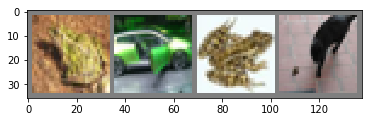

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [34]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [35]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [46]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs = Variable(inputs.cuda())
        labels = Variable(labels.cuda())
        #inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

TypeError: add_ received an invalid combination of arguments - got (int, torch.cuda.FloatTensor), but expected one of:
 * (float value)
 * (torch.FloatTensor other)
 * (torch.SparseFloatTensor other)
 * (float value, torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([32;1mint[0m, [31;1mtorch.cuda.FloatTensor[0m)
 * (float value, torch.SparseFloatTensor other)
      didn't match because some of the arguments have invalid types: ([32;1mint[0m, [31;1mtorch.cuda.FloatTensor[0m)


GroundTruth:    cat  ship  ship plane


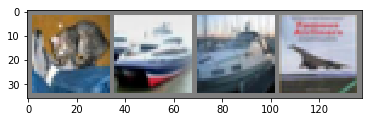

In [37]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [38]:
outputs = net(Variable(images))

In [39]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [40]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [41]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 64 %
Accuracy of  bird : 28 %
Accuracy of   cat : 35 %
Accuracy of  deer : 55 %
Accuracy of   dog : 44 %
Accuracy of  frog : 78 %
Accuracy of horse : 61 %
Accuracy of  ship : 76 %
Accuracy of truck : 57 %


In [42]:
net.cuda()

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [44]:
type(inputs)

torch.autograd.variable.Variable

In [43]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

RuntimeError: Variable data has to be a tensor, but got Variable